Enter edges of the graph (format: u v). Type 'done' when finished:


 A B
 A C
 B C
 B F
 F E
 C D
 D F
 done


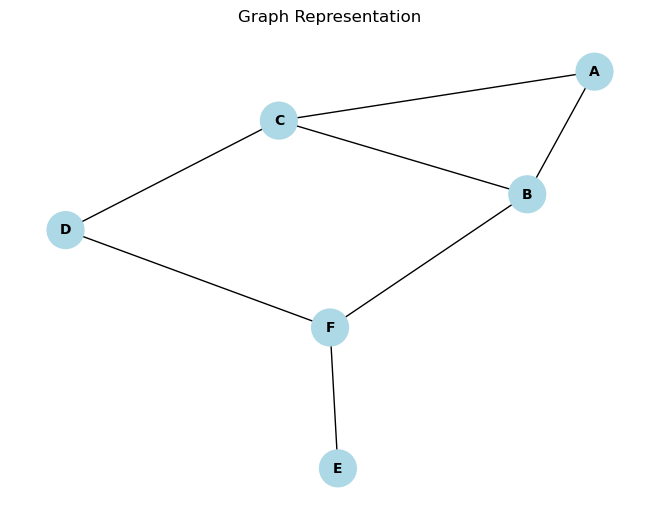


Enter the starting vertex for DFS:  B



Depth First Search:
Visited: B


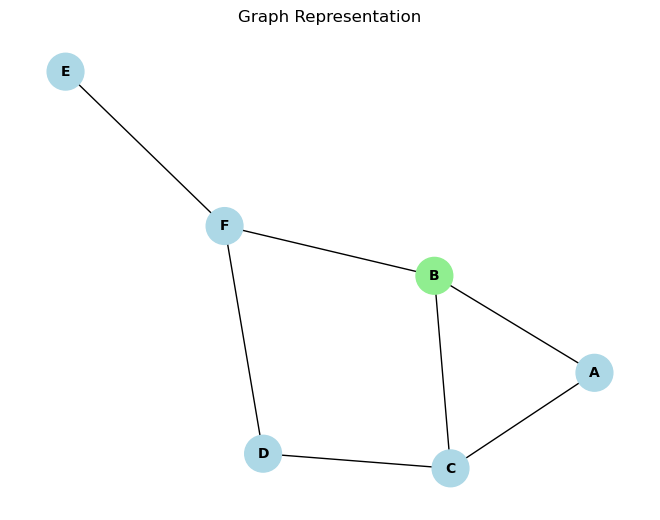

Visited: A


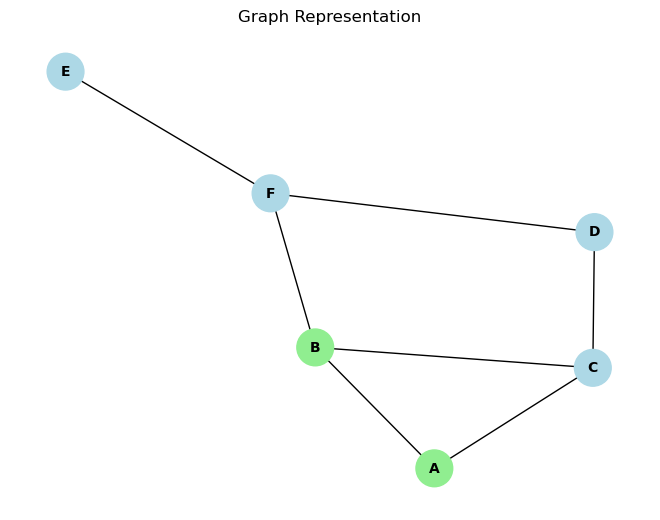

Visited: C


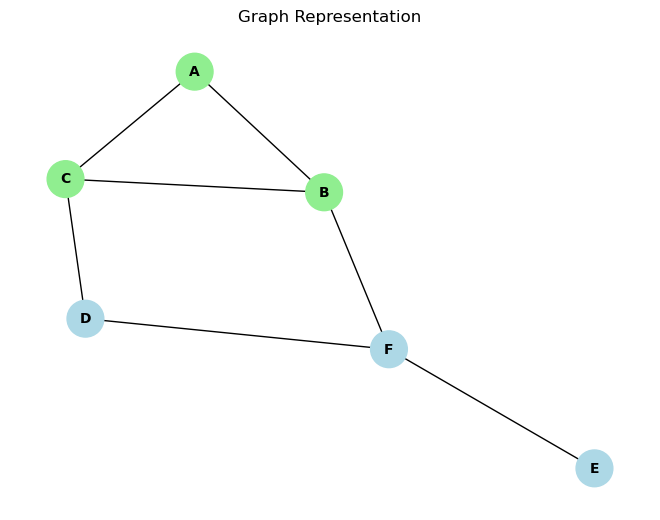

Visited: D


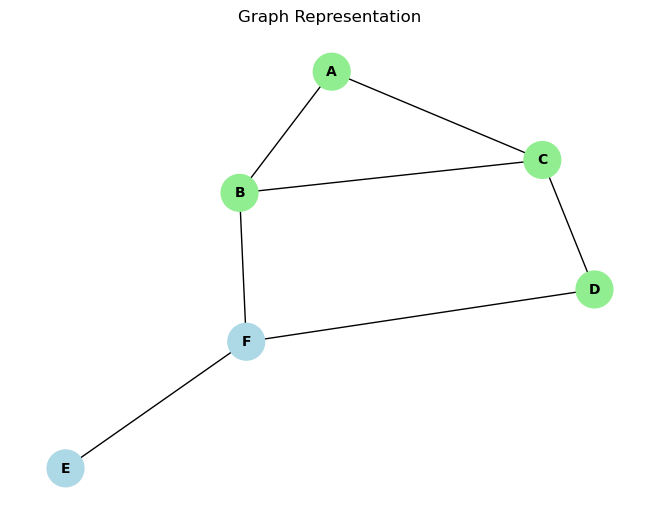

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import time

class Graph:
    def __init__(self):
        self.graph = {}
    
    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []
        self.graph[u].append(v)
        self.graph[v].append(u)  # Undirected graph

    def draw_graph(self, visited=None):
        G = nx.Graph()
        for u in self.graph:
            for v in self.graph[u]:
                G.add_edge(u, v)
        
        pos = nx.spring_layout(G)
        
        if visited is None:
            visited = set()
        
        node_color = ['lightblue' if node not in visited else 'lightgreen' for node in G.nodes()]
        nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_color, font_size=10, font_weight='bold')
        plt.title("Graph Representation")
        plt.show()

    def dfs(self, start, visited=None):
        if visited is None:
            visited = set()
        
        traversal_order = []
        def dfs_recursive(node):
            if node in visited:
                return
            visited.add(node)
            traversal_order.append(node)
            print(f"Visited: {node}")
            self.draw_graph(visited)  # Visualize the graph after visiting a node
            time.sleep(1)  # Pause to visualize

            for neighbor in sorted(self.graph.get(node, [])):
                if neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        
        # Final visualization with complete traversal
        print("\nDFS Traversal Order:", " -> ".join(traversal_order))
        self.draw_graph(visited)

    def bfs(self, start):
        visited = set()
        queue = [start]
        traversal_order = []
        visited.add(start)
        
        while queue:
            vertex = queue.pop(0)
            traversal_order.append(vertex)
            print(f"Visited: {vertex}")
            self.draw_graph(visited)  # Visualize the graph after visiting a node
            time.sleep(1)  # Pause to visualize

            for neighbor in self.graph.get(vertex, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        
        # Final visualization with complete traversal
        print("\nBFS Traversal Order:", " -> ".join(traversal_order))
        self.draw_graph(visited)

def main():
    g = Graph()
    
    # User input for edges
    print("Enter edges of the graph (format: u v). Type 'done' when finished:")
    while True:
        edge = input().strip()
        if edge.lower() == 'done':
            break
        try:
            u, v = edge.split()
            g.add_edge(u, v)
        except ValueError:
            print("Invalid input! Please enter two vertices separated by a space.")
    
    # Display the graph
    g.draw_graph()  # Initial graph display without any visited nodes

    # Perform DFS
    start_vertex = input("\nEnter the starting vertex for DFS: ").strip()
    if start_vertex in g.graph:
        print("\nDepth First Search:")
        g.dfs(start_vertex)
    else:
        print(f"Error: Vertex '{start_vertex}' not found in the graph!")

    # Perform BFS
    start_vertex = input("\nEnter the starting vertex for BFS: ").strip()
    if start_vertex in g.graph:
        print("\nBreadth First Search:")
        g.bfs(start_vertex)
    else:
        print(f"Error: Vertex '{start_vertex}' not found in the graph!")

if __name__ == "__main__":
    main()
